In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()  # This tells Python we will "scan" the database
Base.prepare(autoload_with=engine)  # Updated to avoid the warning

# reflect the tables
Base.classes.keys()  # This will list all the tables found in the database


['station', 'measurement']

In [6]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station


In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)


2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


In [11]:
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in dataset
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
print(one_year_ago)


2016-08-23 00:00:00


In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp)\
                            .filter(Measurement.date >= one_year_ago)\
                            .all()

# Print the first 5 rows to check the output
precipitation_data[:5]


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01)]

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=["date", "precipitation"])

# Print the first 5 rows to check the DataFrame
precipitation_df.head()


,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [14]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("date")

# Print the first 5 rows to check if sorting worked
precipitation_df.head()


,date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [15]:
# Drop rows with missing precipitation values
precipitation_df = precipitation_df.dropna()

# Print first 5 rows to confirm NaN values are removed
precipitation_df.head()


,date,precipitation
0,2016-08-24,0.08
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45


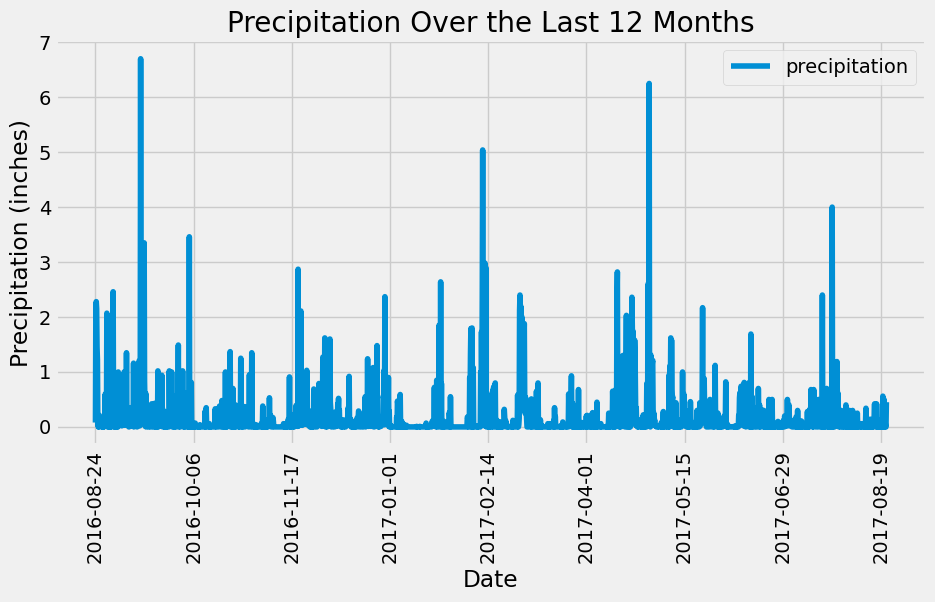

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x="date", y="precipitation", figsize=(10,5), rot=90)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Over the Last 12 Months")

# Show the plot
plt.show()


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).distinct().count()
print(total_stations)


9


In [25]:
# Design a query to find the most-active stations
active_stations = session.query(Station.station, func.count(Measurement.station))\
    .filter(Measurement.station == Station.station)\
    .group_by(Station.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# Print the most active station(s)
print(active_stations)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
station_id = 'USC00519281'

temperature_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == station_id).all()

# Print the temperature stats
print(f"Station {station_id} - Min Temp: {temperature_stats[0][0]}, Max Temp: {temperature_stats[0][1]}, Avg Temp: {temperature_stats[0][2]}")


Station USC00519281 - Min Temp: 54.0, Max Temp: 85.0, Avg Temp: 71.66378066378067


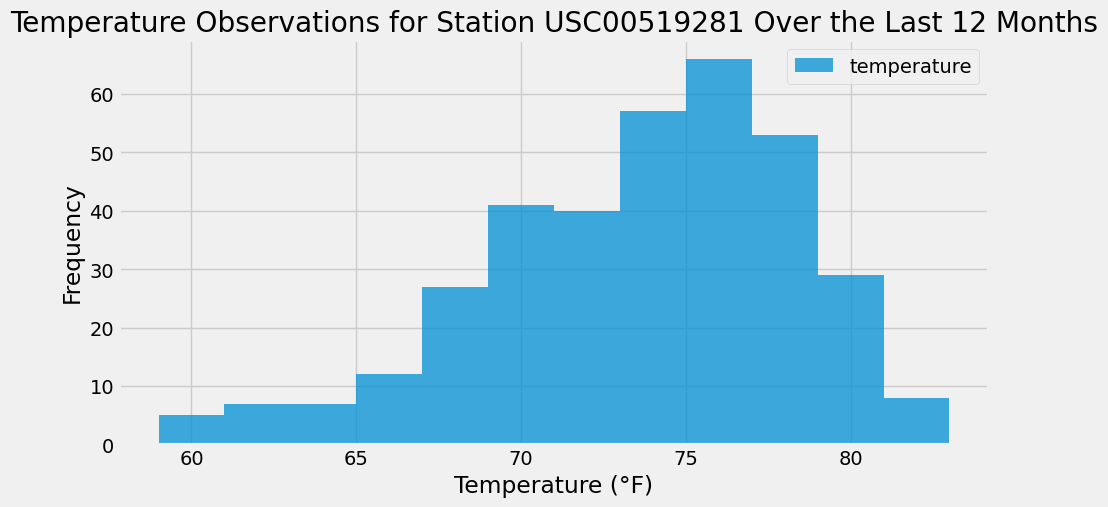

In [27]:
# Query the last 12 months of temperature observation data for this station
temperature_data = session.query(Measurement.tobs)\
    .filter(Measurement.station == station_id)\
    .filter(Measurement.date >= one_year_ago)\
    .all()

# Convert the result into a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=["temperature"])

# Plot the histogram with bins=12
temperature_df.plot.hist(bins=12, figsize=(10,5), alpha=0.75)

# Add labels and title
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for Station {station_id} Over the Last 12 Months")

# Show the plot
plt.show()



# Close Session

In [29]:
# Close Session
session.close()